<a href="https://colab.research.google.com/github/Jonasafutu/Capstone-Project/blob/Jonas_Branch/Team_Paris_Capstone_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TEAM PARIS - CAPSTONE PROJECT***

# _CUSTOMER CHURN PREDICTION PROJECT_

# **Backgrond / Introduction**

This project is for an African telecommunications company (Expresso) that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each customer ***“churning,”*** i.e. becoming inactive and not making any transactions for 90 days.

This solution will help this telecom company to better serve their customers by understanding which customers are at risk of leaving.

# **Business Understanding**
The objective of this hackathon is to develop a predictive model that determines the likelihood for a customer to churn - to stop purchasing airtime and data from the client.

The objective of this project aims to throw more light on the churn rate of the customer, the reasons for churn and possible ways to avert more customers from churning and improve the customer attrition.

The evaluation metric for this project is Area Under the Curve (AUC).
The values can be between 0 and 1, inclusive. Where 1 indicates the customer churned and 0 indicates the customer stayed with Expresso.

This project is to predict the likelihood customers who will churn. Deployment will be via Graio or Streamlit with the model integrated into an API (Application Programme Interface) using FastAPI

# **Data Understanding**

The data describes 1.5 million clients split into two data sets: _"Train.csv"_ and _"Test.csv"_

**_user_id_** - User Identification

**_REGION_** -  The location of the user

**_TENURE_** -  Duration the user has spent on the network (in months)

**_MONTANT_** - The top-up amount

**_FREQUENCY_RECH_** - The number of times the customer has refilled

**_REVENUE_** -   Monthly income of customers

**_ARP_SEGMENT_** -   Income over 90 days / 3

**_FREQUENCY_** - The number of times the client has made an income

**_DATA_VOLUME_** - The number of connections

**_ON_NET_** -  Inter expresso call

**_ORANGE_** -  The number of calls to Orange network

**_TIGO_** -  The number of calls to Tigo network

**_ZONE1_** -   Calls to zone 1

**_ZONE2_** -   Calls to zone 2

**_MRG_** -   A customer who is going

**_REGULARITY_** - Number of times a customer is active for 90 days

**_TOP_PACK_** - Most active packs

**_FREQ_TOP_PACK_** - Number of times the customer activated the top pack packages

**_CHURN_** - Target variable to predict


# **Hypothesis and Questions**

***Hypothesis***

***Null Hypothesis (H0)***: There is no relationship between the monthly income and churn.

***Alternate Hypothesis (H1):*** There is a relationship between the monthly income and churn
***Questions***

1. How many times did the customers refill?

2. How active are the customers over a 90 day period?

3. How many customers make on net calls and off net calls?

4. What is the ratio of calls customers made to Orange and Tigo?

5. What package has the most top-ups?

6. What location has the most customers?

7. What is the chrn distribution of the customers?

8. What is the churn distribution by expresso, tigo and orange?

9. Which customers churned by top-up amount and income?

10. What is the distribution of churn by refill?

11. Do customers with high income make the most top-ups?

12. What region make the most top-ups?


### **Importing all relevant libraries and packages**

In [ ]:
# Data Manipuulation
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix , classification_report, f1_score, accuracy_score,\
precision_score, recall_score, fbeta_score, make_scorer, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
#from skopt import BayesSearchCV
from sklearn.utils import class_weight

import scipy.stats as stats

# models
from sklearn import svm
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# model interpretation
#import shap

import pickle
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Azubi Capstone Project/Data/Train.csv')
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


### **Overview of Dataset**

In [ ]:
# Listing the columns in the data
train.columns.to_list()

['user_id',
 'REGION',
 'TENURE',
 'MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'ZONE1',
 'ZONE2',
 'MRG',
 'REGULARITY',
 'TOP_PACK',
 'FREQ_TOP_PACK',
 'CHURN']

In [ ]:
# Checking the shape of the data
train.shape

(1077024, 19)

>- **The dataset has 1077024 rows and 19 columns**

In [ ]:
# Checking more information about that the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

>- **With the exception of the "user_id" column, there are 4 categorical variables and 14 numerical variabeles**

In [ ]:
# Checking summary statistics of the data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


>- **From the summary statistics, the mean monthly top-up is 5529.2 and almost 50% of that was spent on activites made on the expresso network with a mean of 277.06 for on_net activity.**

## **Check the correlation between the various columns**

In [ ]:
# Find the correlation between the columns
corr_matrix = train.corr()
corr_matrix

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.791875,0.976696,0.976696,0.776145,0.307393,0.324712,0.656019,0.409970,0.374499,0.421718,0.522629,0.740936,-0.105110
FREQUENCE_RECH,0.791875,1.000000,0.798738,0.798737,0.955882,0.158125,0.403519,0.519295,0.341645,0.116630,0.125633,0.558206,0.869419,-0.123849
REVENUE,0.976696,0.798738,1.000000,1.000000,0.786208,0.313408,0.329744,0.659143,0.408489,0.384992,0.390504,0.532299,0.751271,-0.114401
ARPU_SEGMENT,0.976696,0.798737,1.000000,1.000000,0.786207,0.313408,0.329744,0.659144,0.408489,0.384992,0.390504,0.532297,0.751270,-0.114402
FREQUENCE,0.776145,0.955882,0.786208,0.786207,1.000000,0.174710,0.392982,0.472755,0.305933,0.110514,0.142466,0.591730,0.845926,-0.139982
DATA_VOLUME,0.307393,0.158125,0.313408,0.313408,0.174710,1.000000,-0.014208,0.061651,0.022279,0.037533,0.044698,0.187996,0.123775,-0.033699
ON_NET,0.324712,0.403519,0.329744,0.329744,0.392982,-0.014208,1.000000,0.219325,0.135288,0.004170,-0.014595,0.269578,0.354593,-0.058102
ORANGE,0.656019,0.519295,0.659143,0.659144,0.472755,0.061651,0.219325,1.000000,0.400364,0.050091,0.031593,0.311036,0.553373,-0.064132
TIGO,0.409970,0.341645,0.408489,0.408489,0.305933,0.022279,0.135288,0.400364,1.000000,0.013983,0.026644,0.192935,0.369987,-0.035993
ZONE1,0.374499,0.116630,0.384992,0.384992,0.110514,0.037533,0.004170,0.050091,0.013983,1.000000,0.042970,0.045154,0.190099,0.009309


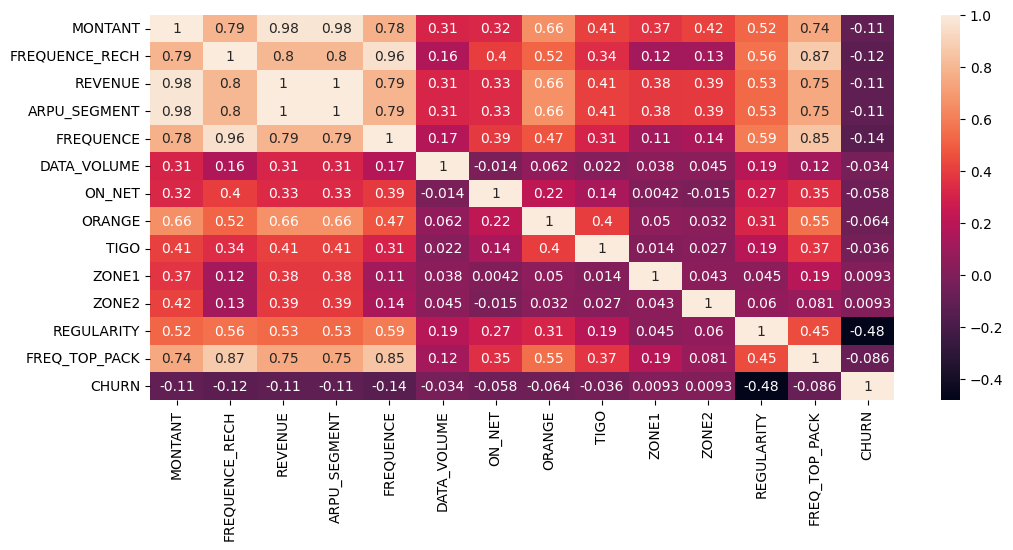

In [ ]:
# Plot a heatmap for the correlations
plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot=True)
plt.show();

In [ ]:
 # get the minimum value
min_corr = corr_matrix.min().min()
# get the columns involved
min_corr_cols = corr_matrix.unstack().idxmin()

print('The minimum correlation was:', min_corr)
print('The columns involved are:', min_corr_cols)

The minimum correlation was: -0.47974568648386706
The columns involved are: ('REGULARITY', 'CHURN')


In [ ]:
# get the minimum value
max_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
            .max().max())

# get the maximum value (excluding same columns)
# get the columns involved
max_corr_cols = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
                 .stack().idxmax())

print('The maximun correlation was:', max_corr)
print('The columns involved are:', max_corr_cols)

The maximun correlation was: 0.9999999933584335
The columns involved are: ('REVENUE', 'ARPU_SEGMENT')


>- **The lowest correlation is -0.47974568648386706 between REGULARITY and CHURN.**

>- **The highest correlation is 0.9999999933584335 between REVENUE and ARPU_SEGMENT**

In [ ]:
# Checking for missing/null values
train.isna().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [ ]:
# Calculate the total number of rows in the dataset
total_rows = train.shape[0]

# Calculate the percentage of missing values for each column
missing_percentage = (train.isnull().sum() / total_rows) * 100

# Format the output to display two decimal places
missing_percentage_formatted = missing_percentage.round(2)

print("Percentage of Missing Values for Each Column:")
print(missing_percentage_formatted)


Percentage of Missing Values for Each Column:
user_id            0.00
REGION            39.40
TENURE             0.00
MONTANT           35.09
FREQUENCE_RECH    35.09
REVENUE           33.64
ARPU_SEGMENT      33.64
FREQUENCE         33.64
DATA_VOLUME       49.19
ON_NET            36.51
ORANGE            41.52
TIGO              59.87
ZONE1             92.12
ZONE2             93.61
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.86
FREQ_TOP_PACK     41.86
CHURN              0.00
dtype: float64


>- We can observe from the above cell that most of the columns have missing values of high magnitude with Zone1 and Zone2 having the highest perentage of missing values, at 92.12% and 93.61% repectively.

In [ ]:
# Checking for duplicates
train.duplicated().sum()

0

>- **There are no duplicates**

In [ ]:
# Create a function to print the number of unique values
def print_unique_values(train):
    values = {}
    for col in train.columns:
        number = train[col].nunique()
        print(f'{col}: has {number} of unique values')

In [ ]:
print_unique_values(train)

user_id: has 1077024 of unique values
REGION: has 14 of unique values
TENURE: has 8 of unique values
MONTANT: has 4357 of unique values
FREQUENCE_RECH: has 119 of unique values
REVENUE: has 31810 of unique values
ARPU_SEGMENT: has 14062 of unique values
FREQUENCE: has 91 of unique values
DATA_VOLUME: has 32459 of unique values
ON_NET: has 8202 of unique values
ORANGE: has 2674 of unique values
TIGO: has 1105 of unique values
ZONE1: has 482 of unique values
ZONE2: has 394 of unique values
MRG: has 1 of unique values
REGULARITY: has 62 of unique values
TOP_PACK: has 126 of unique values
FREQ_TOP_PACK: has 206 of unique values
CHURN: has 2 of unique values


In [ ]:
# Create a function to check if there are zeros in the data
def number_of_zeros(data):
    for col in data.columns:
        if col != 'Sepssis':
            count = (data[col] == 0).sum()
            print(f'Count of zeros in Column  {col} : {count}')

In [ ]:
number_of_zeros(train)

Count of zeros in Column  user_id : 0
Count of zeros in Column  REGION : 0
Count of zeros in Column  TENURE : 0
Count of zeros in Column  MONTANT : 0
Count of zeros in Column  FREQUENCE_RECH : 0
Count of zeros in Column  REVENUE : 0
Count of zeros in Column  ARPU_SEGMENT : 2157
Count of zeros in Column  FREQUENCE : 0
Count of zeros in Column  DATA_VOLUME : 160055
Count of zeros in Column  ON_NET : 53770
Count of zeros in Column  ORANGE : 30806
Count of zeros in Column  TIGO : 47079
Count of zeros in Column  ZONE1 : 29902
Count of zeros in Column  ZONE2 : 20254
Count of zeros in Column  MRG : 0
Count of zeros in Column  REGULARITY : 0
Count of zeros in Column  TOP_PACK : 0
Count of zeros in Column  FREQ_TOP_PACK : 0
Count of zeros in Column  CHURN : 875031


## **Hypothesis Testing**

In [ ]:
# Select the 'MONTANT' (monthly income) and 'CHURN' columns
monthly_income = train['MONTANT']
churn = train['CHURN'].astype(int)

# Remove rows with missing values
data = pd.concat([monthly_income, churn], axis=1).dropna()

# Perform correlation analysis
correlation, p_value = stats.pearsonr(data['MONTANT'], data['CHURN'])

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value > 0.05:
    print('Fail to reject the null hypothesis.')
else:
    print('Reject the null hypothesis.')

Correlation coefficient: -0.10510982376241933
P-value: 0.0
Reject the null hypothesis.


>- ***Points to note***

1. Remove Zone 1 nad Zone 2: This may have no impact on our analysis since both columns are almost 100% empty.

2. We need to eliminate MRG means from our analysis, considering it has just one value (NO) which does not provide enough information to work with.

From the above observations, most of the columns have missing values of about (30 to 90)%. Working with these columns may be appropriate since they have a high percentage of missing values. In order to address this, we need to perform a missin value impuutation for these columns.

We will replace these missing vallues with the mean of their respective columns.

DAKAR          256259
THIES           90171
SAINT-LOUIS     59895
LOUGA           49679
KAOLACK         48498
DIOURBEL        33564
TAMBACOUNDA     27562
KAFFRINE        22067
KOLDA           19464
FATICK          17775
MATAM           14650
ZIGUINCHOR      11036
SEDHIOU          1553
KEDOUGOU          514
Name: REGION, dtype: int64


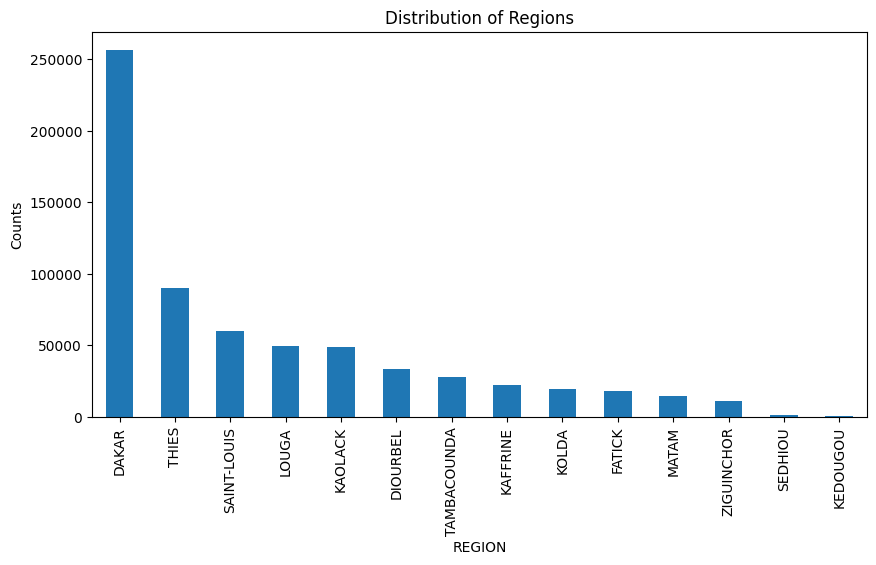

In [ ]:
# Count the levels in the 'REGION' categorical feature
region_counts = train['REGION'].value_counts()
print(region_counts)

# Plot the counts as a bar chart
plt.figure(figsize=(10, 5))
region_counts.plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('REGION')
plt.title('Distribution of Regions')
plt.show()


K > 24 month     1021853
I 18-21 month      22494
H 15-18 month      12913
G 12-15 month       7520
J 21-24 month       6324
F 9-12 month        4604
E 6-9 month          929
D 3-6 month          387
Name: TENURE, dtype: int64


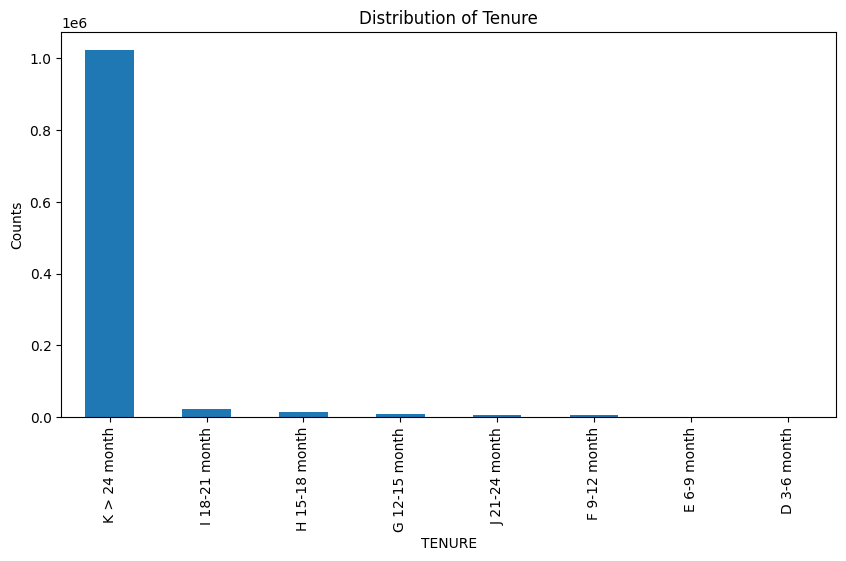

In [ ]:
# Count the levels in the 'TENURE' categorical feature
tenure_counts = train['TENURE'].value_counts()
print(tenure_counts)

# Plot the counts as a bar chart
plt.figure(figsize=(10, 5))
tenure_counts.plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('TENURE')
plt.title('Distribution of Tenure')
plt.show()

In [37]:
# Count the levels in the 'TOP_PACK' categorical feature
top_pack_counts = train['TOP_PACK'].value_counts()

# Create an interactive dropdown widget
num_top_packs_dropdown = widgets.Dropdown(
    options=[5, 10, 15, 20],
    value=10,
    description='Number of Top Packages:',
)

# Define a function to update the plot based on the selected number
def update_plot(num_top):
    top_n_counts = top_pack_counts.head(num_top)

    plt.figure(figsize=(10, 5))
    top_n_counts.plot(kind='bar')
    plt.ylabel('Counts')
    plt.xlabel('TOP_PACK')
    plt.title(f'Distribution of Top {num_top} Packages')
    plt.show()

# Display the interactive widget and plot
widgets.interactive(update_plot, num_top=num_top_packs_dropdown)

interactive(children=(Dropdown(description='Number of Top Packages:', index=1, options=(5, 10, 15, 20), value=…

In [ ]:
# create a functioon to replace the missing values with mean for each respective column
columns_to_fill = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
                   'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
                   'FREQ_TOP_PACK']

for column in columns_to_fill:
    train[column].fillna(train[column].mean(), inplace=True)


In [ ]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.000000,8.167483,7.709844,NO,62,On net 200F=Unlimited _call24H,30.000000,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,NO,3,NaN,9.262446,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,NO,1,NaN,9.262446,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.000000,8.167483,2.000000,NO,61,"Data:490F=1GB,7d",7.000000,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.000000,8.167483,7.709844,NO,56,All-net 500F=2000F;5d,11.000000,0


In [ ]:
# Checking for missing/null values
train.isna().sum()

user_id                0
REGION            424337
TENURE                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
ZONE1                  0
ZONE2                  0
MRG                    0
REGULARITY             0
TOP_PACK          450895
FREQ_TOP_PACK          0
CHURN                  0
dtype: int64

In [ ]:
# Create a DataFrame
train = pd.DataFrame(train)

# Fill missing values based on the frequency distribution
def fill_missing_with_distribution(column):
    freq_distribution = column.value_counts(normalize=True)
    missing_count = column.isnull().sum()
    missing_indices = column[column.isnull()].index
    imputed_values = np.random.choice(freq_distribution.index, size=missing_count, p=freq_distribution.values)
    column[missing_indices] = imputed_values

# Perform missing value imputation for each categorical column
categorical_columns = ['REGION', 'TOP_PACK']

for col in categorical_columns:
    fill_missing_with_distribution(train[col])

train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.000000,8.167483,7.709844,NO,62,On net 200F=Unlimited _call24H,30.000000,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,THIES,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,NO,3,On net 200F=Unlimited _call24H,9.262446,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,DAKAR,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,NO,1,All-net 500F =2000F_AllNet_Unlimited,9.262446,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.000000,8.167483,2.000000,NO,61,"Data:490F=1GB,7d",7.000000,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.000000,8.167483,7.709844,NO,56,All-net 500F=2000F;5d,11.000000,0


In [ ]:
# Check to verify mmissing values have een replaced
train.isna().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

**DATA IS NOW PROPERLY CLEANED. PROCEED WITH DATA ANALYSIS / EDA**

***Next Steps***
1. Perform all the above cleaning steps for the test set

2. Commence EDA to answer questions